<a href="https://colab.research.google.com/github/supai-red/DS-Unit-2-Applied-Modeling/blob/master/WID4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
import warnings
warnings.filterwarnings(action='ignore', category = FutureWarning, module='numpy')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
'''
Data construction and wrangling

Target = wealth top decile (X)

List of numeric features
 -income top decile (X)
 -income top centile (X)
 -Income/adult
 -Wealth/adult
 -net national wealth/net national income ratio
 
 
List of categorical features
-presidential party (X)
-house majority party (X)
-senate majority party (X)

'''

'\nData construction and wrangling\n\nTarget = wealth top decile (X)\n\nList of numeric features\n -income top decile (X)\n -income top centile (X)\n -Income/adult\n -Wealth/adult\n -net national wealth/net national income ratio\n \n \nList of categorical features\n-presidential party (X)\n-house majority party (X)\n-senate majority party (X)\n\n'

In [0]:
top_10 = pd.read_csv('wealth_income_top_10_1917_2014_to_use.csv')

In [0]:
top_1 = pd.read_csv('WID_Data_top1_income_wealth_1917_2014_to_use.csv')

In [0]:
m1 = pd.merge(top_10, top_1, on='year')

In [0]:
avg_inc = pd.read_csv('WID_Data_avg_income_1917_2014_to_use.csv')

In [0]:
m2 = pd.merge(m1, avg_inc, on='year')

In [0]:
avg_wealth= pd.read_csv('WID_Data_avg_wealth_1917_2014_to_use.csv')

In [0]:
m3 = pd.merge(m2, avg_wealth, on='year')

In [0]:
wealth_income_ratio = pd.read_csv('WID_Data_wealth_to_income_ratio_1917_2014_to_use.csv')

In [0]:
m4 = pd.merge(m3, wealth_income_ratio, on='year')

In [0]:
party = pd.read_csv('presidents_congress_party_to_use_3.csv')

In [0]:
m5 = pd.merge(m4, party, on='year')

In [0]:
m5.head()

,year,income_top_10,wealth_top_10,income_top_1,wealth_top_1,avg_income,avg_wealth,wealth_to_income_ratio,presidential_party,house_majority,senate_majority
0,1917,0.4490,0.7831,0.2014,0.4053,9680.3068,44275.8870,4.573801,Democrat,Republican,Democrat
1,1918,0.4364,0.7857,0.1895,0.3705,10241.6709,38999.2310,3.807906,Democrat,Republican,Democrat
2,1919,0.4543,0.8008,0.2101,0.4001,9704.4418,37818.4303,3.897024,Democrat,Republican,Republican
3,1920,0.4344,0.7810,0.1840,0.3567,9493.4117,33534.1707,3.532356,Democrat,Republican,Republican
4,1921,0.4653,0.7799,0.1810,0.3680,8560.9725,37234.4389,4.349326,Republican,Republican,Republican


In [0]:
df = m5 

In [0]:
df.head()

,year,income_top_10,wealth_top_10,income_top_1,wealth_top_1,avg_income,avg_wealth,wealth_to_income_ratio,presidential_party,house_majority,senate_majority
0,1917,0.4490,0.7831,0.2014,0.4053,9680.3068,44275.8870,4.573801,Democrat,Republican,Democrat
1,1918,0.4364,0.7857,0.1895,0.3705,10241.6709,38999.2310,3.807906,Democrat,Republican,Democrat
2,1919,0.4543,0.8008,0.2101,0.4001,9704.4418,37818.4303,3.897024,Democrat,Republican,Republican
3,1920,0.4344,0.7810,0.1840,0.3567,9493.4117,33534.1707,3.532356,Democrat,Republican,Republican
4,1921,0.4653,0.7799,0.1810,0.3680,8560.9725,37234.4389,4.349326,Republican,Republican,Republican


In [0]:
m5.tail()

,year,income_top_10,wealth_top_10,income_top_1,wealth_top_1,avg_income,avg_wealth,wealth_to_income_ratio,presidential_party,house_majority,senate_majority
93,2010,0.4575,0.7418,0.1980,0.3900,48798.1755,202917.8490,4.158310,Democrat,Democrat,Democrat
94,2011,0.4592,0.7413,0.1960,0.3743,49584.5242,201524.5226,4.064261,Democrat,Republican,Democrat
95,2012,0.4714,0.7446,0.2078,0.3885,50763.9673,205494.3466,4.048037,Democrat,Republican,Democrat
96,2013,0.4632,0.7231,0.1959,0.3828,50835.7711,227682.4388,4.478785,Democrat,Republican,Democrat
97,2014,0.4702,0.7299,0.2020,0.3856,51921.6204,247361.7169,4.764139,Democrat,Republican,Democrat


In [0]:
df.isnull().sum()

year                      0
income_top_10             2
wealth_top_10             0
income_top_1              2
wealth_top_1              0
avg_income                0
avg_wealth                0
wealth_to_income_ratio    0
presidential_party        0
house_majority            0
senate_majority           0
dtype: int64

In [0]:
df = df.fillna(method = 'ffill')

In [0]:
df.isnull().sum()

year                      0
income_top_10             0
wealth_top_10             0
income_top_1              0
wealth_top_1              0
avg_income                0
avg_wealth                0
wealth_to_income_ratio    0
presidential_party        0
house_majority            0
senate_majority           0
dtype: int64

In [0]:
df['presidential_party'].value_counts()

Republican       40
Democrat         28
Democrat         16
Republican        8
  Democrat        6
Name: presidential_party, dtype: int64

In [0]:
df['presidential_party'] = df['presidential_party'].str.strip()

In [0]:
df['presidential_party'].value_counts()

Democrat      50
Republican    48
Name: presidential_party, dtype: int64

In [0]:
df.dtypes

year                        int64
income_top_10             float64
wealth_top_10             float64
income_top_1              float64
wealth_top_1              float64
avg_income                float64
avg_wealth                float64
wealth_to_income_ratio    float64
presidential_party         object
house_majority             object
senate_majority            object
dtype: object

## Feature Engingeering

In [0]:
df['democrat_stack'] = (df['house_majority']=='Democrat') & (df['senate_majority']=='Democrat')
df['republican_stack'] = (df['house_majority']=='Republican') & (df['senate_majority']=='Republican')

 

In [0]:
print(df['democrat_stack'].value_counts())
df['republican_stack'].value_counts()
#Should make these non-Boolean and assign numeric values


True     54
False    44
Name: democrat_stack, dtype: int64


False    70
True     28
Name: republican_stack, dtype: int64

In [0]:
df.columns.tolist()

['year',
 'income_top_10',
 'wealth_top_10',
 'income_top_1',
 'wealth_top_1',
 'avg_income',
 'avg_wealth',
 'wealth_to_income_ratio',
 'presidential_party',
 'house_majority',
 'senate_majority',
 'democrat_stack',
 'republican_stack']

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 13 columns):
year                      98 non-null int64
income_top_10             98 non-null float64
wealth_top_10             98 non-null float64
income_top_1              98 non-null float64
wealth_top_1              98 non-null float64
avg_income                98 non-null float64
avg_wealth                98 non-null float64
wealth_to_income_ratio    98 non-null float64
presidential_party        98 non-null object
house_majority            98 non-null object
senate_majority           98 non-null object
democrat_stack            98 non-null bool
republican_stack          98 non-null bool
dtypes: bool(2), float64(7), int64(1), object(3)
memory usage: 9.4+ KB


## Baseline

In [0]:
from sklearn.metrics import r2_score

baseline = df['wealth_top_10'].mean()
print("Baseline wealth of the top decile is" , baseline)
# Baseline is that the top decile holds 71% of the wealth.
# Not sure about print output.
y_pred = [baseline]*len(df['wealth_top_10'])
y_pred
y_true = df['wealth_top_10']

r2_score(y_true, y_pred)

Baseline wealth of the top decile is 0.7128653054081633


0.0

In [0]:
import plotly.express as px
px.scatter(df, x='year', y='wealth_top_10', color="presidential_party", title="Percentage of wealth held by the top decile (10%) in US 1917-2014")  

## Exploratory plots

In [0]:
import plotly.express as px
px.scatter(df, x = 'income_top_10', y='wealth_top_10')

In [0]:
# With OLS
# Wealth x. income
px.scatter(df, x = 'income_top_10', y='wealth_top_10', trendline='ols')

In [0]:
# Wealth x year
px.scatter(df, x = 'year', y='wealth_top_10', trendline='ols', title = "Percentage of Wealth held by the Top Decile in US ranges from 60-85% between 1917-2014")
# This is non monotonic

In [0]:
# Wealth x year
px.scatter(df, x = 'year', y='wealth_top_1', trendline='ols', title = "Percentage of wealth held by the top centile (1%) in US ranges from 21-48% between 1917-2014")
# This is non monotonic

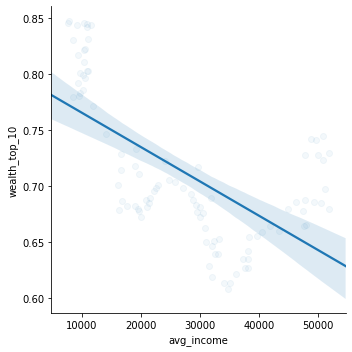

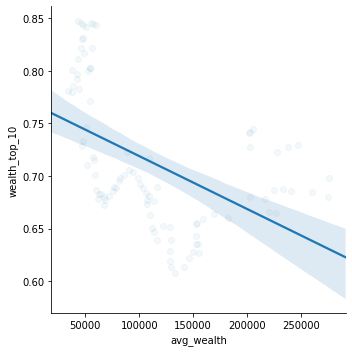

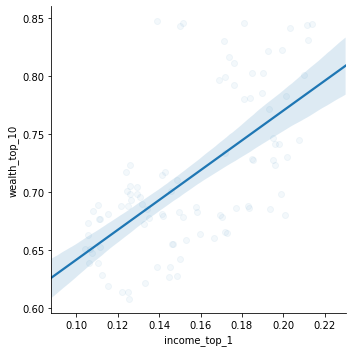

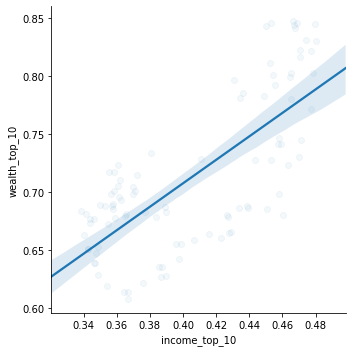

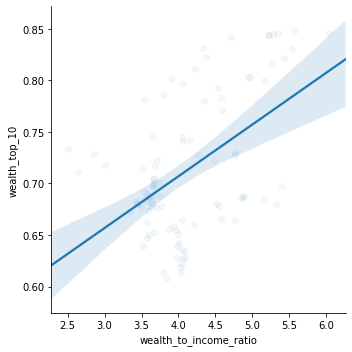

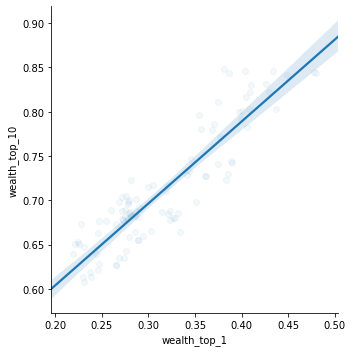

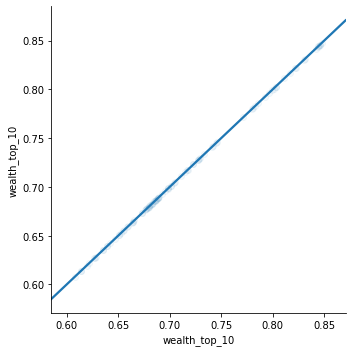

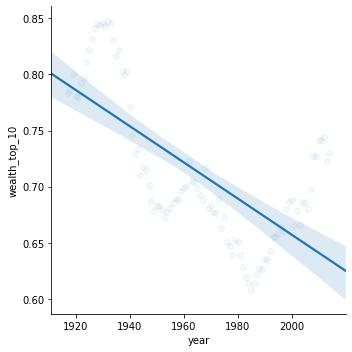

In [0]:
import seaborn as sns
numeric = df.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='wealth_top_10', data=df, scatter_kws=dict(alpha=0.05))

In [0]:
# Wealth x year
px.scatter(df, x ='year', y='wealth_to_income_ratio', trendline='lowess',  title = 
           "Capital / Income Ratio in US 1917-2014")


## Divide Data

In [0]:
train = df[(df['year']>= 1984) & (df['year'] <2000)]

In [0]:
test = df[(df['year'] >= 2000)]

In [0]:
train

,year,income_top_10,wealth_top_10,income_top_1,wealth_top_1,avg_income,avg_wealth,wealth_to_income_ratio,presidential_party,house_majority,senate_majority,democrat_stack,republican_stack
67,1984,0.3666,0.6137,0.1250,0.2386,34111.1471,129256.1439,3.789266,Republican,Democrat,Republican,False,False
68,1985,0.3666,0.6079,0.1255,0.2314,34721.0821,133427.7211,3.842841,Republican,Democrat,Republican,False,False
69,1986,0.3647,0.6138,0.1221,0.2298,35048.3393,141464.6633,4.036274,Republican,Democrat,Republican,False,False
70,1987,0.3761,0.6218,0.1331,0.2461,36141.1236,146245.3542,4.046507,Republican,Democrat,Democrat,True,False
71,1988,0.3895,0.6274,0.1488,0.2650,37663.5117,149899.9832,3.979981,Republican,Democrat,Democrat,True,False
72,1989,0.3867,0.6270,0.1446,0.2657,38120.1173,155053.2425,4.067494,Republican,Democrat,Democrat,True,False
73,1990,0.3871,0.6355,0.1454,0.2743,38100.4307,154367.2816,4.051592,Republican,Democrat,Democrat,True,False
74,1991,0.3856,0.6349,0.1389,0.2688,37332.9374,152596.8389,4.087458,Republican,Democrat,Democrat,True,False
75,1992,0.3978,0.6425,0.1501,0.2757,38065.9637,152653.7823,4.010243,Republican,Democrat,Democrat,True,False
76,1993,0.3956,0.6548,0.1464,0.2883,38379.7914,152286.2596,3.967875,Democrat,Democrat,Democrat,True,False


In [0]:
train.shape, test.shape

((16, 13), (15, 13))

In [0]:
px.scatter(train, x = 'year', y='wealth_top_10', trendline='ols', marginal_y='rug', title="Percentage of wealth held by the top decile (10%) in US 1984-2014")

In [0]:
df.columns

Index(['year', 'income_top_10', 'wealth_top_10', 'income_top_1',
       'wealth_top_1', 'avg_income', 'avg_wealth', 'wealth_to_income_ratio',
       'presidential_party', 'house_majority', 'senate_majority',
       'democrat_stack', 'republican_stack'],
      dtype='object')

In [0]:
px.scatter(train, x = 'year', y='wealth_top_10', color="house_majority", 
           title = "Percentage of Wealth held by the Top Decile in US ranges from 60-72% between 1980-2014")

## Target and features

In [0]:
target = 'wealth_top_10'
exception_1 = 'wealth_top_1'  # This prevents leakage
numerics = df.select_dtypes(include='number').columns.drop([target, exception_1]).tolist()
categoricals = df.select_dtypes(exclude='number').columns.tolist()
features = numerics + categoricals

In [0]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [0]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16, 11), (16,), (15, 11), (15,))

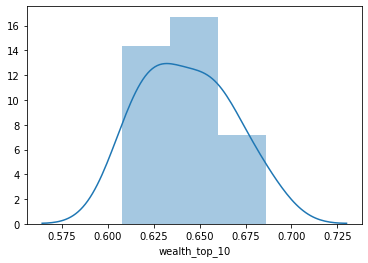

In [0]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [0]:
! pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in c:\users\andrea\anaconda3\lib\site-packages (2.0.0)


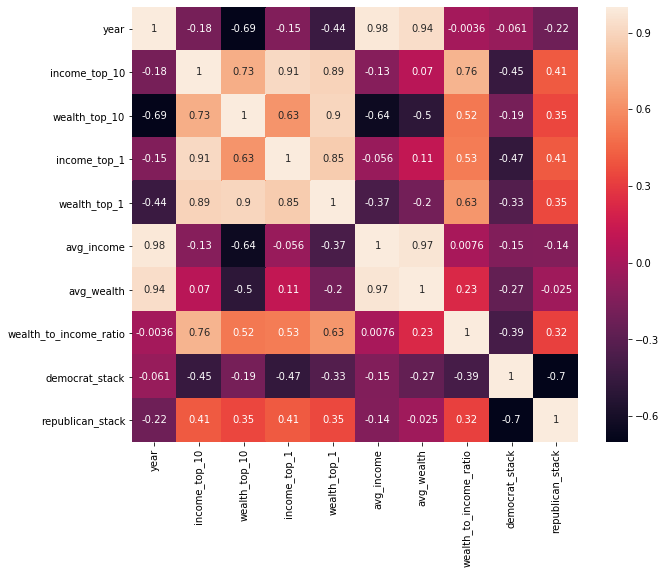

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
#Checking which variables migth predict one another
#income and wealth are generally correlated
#This suggests that wealth is a better predictor of income than labor

In [0]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
 

pipeline = make_pipeline(
    ce.OneHotEncoder(),  
    MinMaxScaler(), 
    LinearRegression() 
)

param_distributions = {
          'linearregression__fit_intercept'  : [True]
               
 }

search = RandomizedSearchCV(            
    pipeline,  
    n_iter=100, # This is the computation budget
    cv=5,  
    scoring='neg_mean_absolute_error',
    param_distributions = param_distributions,
    verbose=10,  
    return_train_score=True, 
    n_jobs=-1              
)


search.fit(X_train, y_train);

#Params for Random Forest Regressor
                 #'randomforestregressor__max_depth' : [3, 15, 25, None],
# #             'randomforestregressor__n_estimators': (10, 20, 50, 100),
# #             'randomforestregressor__bootstrap': [True, False],

C:\Users\Andrea\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning:

The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
C:\Users\Andrea\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [0]:
 pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T

,0
mean_fit_time,0.0650988
std_fit_time,0.00880041
mean_score_time,0.0139
std_score_time,0.000969569
param_linearregression__fit_intercept,True
params,{'linearregression__fit_intercept': True}
split0_test_score,-0.00482161
split1_test_score,-0.0225796
split2_test_score,-0.00538777
split3_test_score,-0.013376


In [0]:
print('Cross-validation MAE', -search.best_score_)  

Cross-validation MAE 0.010287032762754993


In [0]:
intercept = search.best_estimator_.named_steps['linearregression'].intercept_
print (intercept)

0.619968793301987


In [0]:
coefficients = search.best_estimator_.named_steps['linearregression'].coef_
print(coefficients)

[ 0.06160544 -0.00934979  0.01400441 -0.19699902  0.34153126 -0.15006359
 -0.00500346  0.00500346 -0.0023867   0.0023867  -0.00230779  0.00230779
  0.00230779  0.0023867 ]


In [0]:
feature_list = pipeline.named_steps['onehotencoder'].fit_transform(X_train).columns

In [0]:
print(feature_list)

Index(['year', 'income_top_10', 'income_top_1', 'avg_income', 'avg_wealth',
       'wealth_to_income_ratio', 'presidential_party_1',
       'presidential_party_2', 'house_majority_1', 'house_majority_2',
       'senate_majority_1', 'senate_majority_2', 'democrat_stack',
       'republican_stack'],
      dtype='object')


In [0]:
#Here are my predictions for the share of wealth held by the top 10%
y_pred = search.predict(X_test)
print(y_pred)
pd.Series(y_pred).value_counts(normalize=True)

[0.695714   0.68499158 0.68251009 0.68773408 0.70413932 0.72182116
 0.73653991 0.73729875 0.71334945 0.71400783 0.71506335 0.71650511
 0.7194175  0.73897969 0.75625564]


0.704139    0.066667
0.715063    0.066667
0.684992    0.066667
0.682510    0.066667
0.719418    0.066667
0.695714    0.066667
0.687734    0.066667
0.756256    0.066667
0.736540    0.066667
0.714008    0.066667
0.721821    0.066667
0.737299    0.066667
0.716505    0.066667
0.738980    0.066667
0.713349    0.066667
dtype: float64

In [0]:
y_pred.mean()

0.7149551657387363

In [0]:
pipeline = search.best_estimator_

In [0]:
pipeline

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['presidential_party', 'house_majority',
                                     'senate_majority'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
pd.Series(index = feature_list, data=coefficients)

year                      0.061605
income_top_10            -0.009350
income_top_1              0.014004
avg_income               -0.196999
avg_wealth                0.341531
wealth_to_income_ratio   -0.150064
presidential_party_1     -0.005003
presidential_party_2      0.005003
house_majority_1         -0.002387
house_majority_2          0.002387
senate_majority_1        -0.002308
senate_majority_2         0.002308
democrat_stack            0.002308
republican_stack          0.002387
dtype: float64

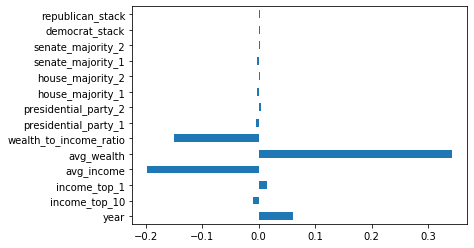

In [0]:
pd.Series(index = feature_list, data=coefficients).plot.barh();

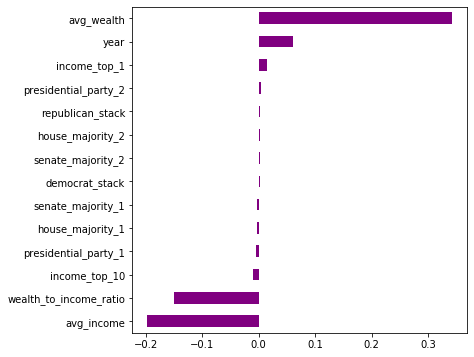

In [0]:
model = pipeline.named_steps['linearregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_train).columns
coefficients = pd.Series(model.coef_, encoded_columns) #making pandas series of coefs and columns
plt.figure(figsize=(6,6)) #could print but here plot figure
coefficients.sort_values().plot.barh(color='purple');

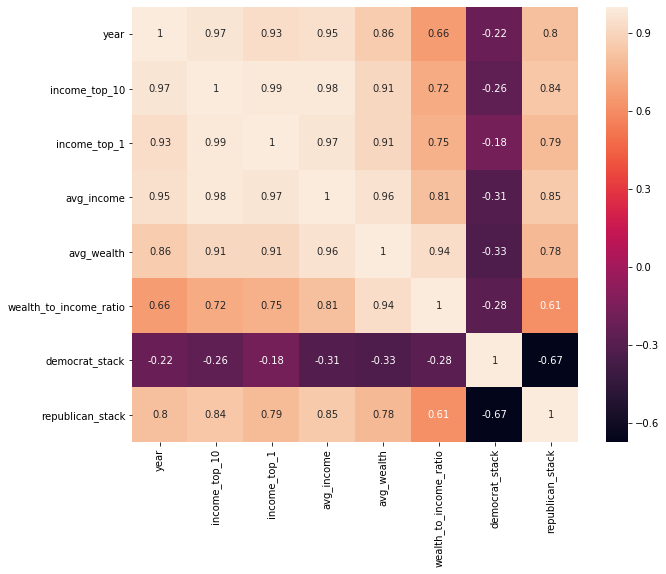

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)